In [1]:
from sklearn import datasets, svm, metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
from PIL import Image
import cv2

In [18]:
class KNN:
    def __init__(self,k):
        self.k = k
        self.mnist = datasets.fetch_openml('mnist_784', data_home='mnist_dataset/')
        nonzero_indexes = []
        for i in range(len(self.mnist['target'])):
            if int(self.mnist['target'][i]) > 0:
                nonzero_indexes.append(i)
            else:
                pass
        
        self.digits = self.mnist['data'][nonzero_indexes]
        self.target = self.mnist['target'][nonzero_indexes]
        self.classifier = KNeighborsClassifier(n_neighbors=k)
        
        share_of_values = int(len(self.digits)//9)
        blank_img = np.zeros((share_of_values,784))
        test_dig = self.digits
        test_dig = np.append(blank_img, test_dig)
        test_dig = test_dig.reshape((len(self.digits)+share_of_values),784)
        
        blank_class = np.repeat(str(999),share_of_values)
        class_targets = self.target
        class_targets = np.append(blank_class,class_targets)
        
        self.digits = test_dig
        self.target = class_targets
        
        
    def mk_dataset(self, test_size=0.20):
        X_Train, X_Test, y_train, y_test = train_test_split(self.digits, self.target, test_size=test_size, random_state=1337)
        return np.array(X_Train), np.array(X_Test), np.array(y_train), np.array(y_test)
    
    def skl_knn(self):
        X_Train, X_Test, y_train, y_test = KNN.mk_dataset(self)
        self.classifier.fit(X_Train,y_train)
        y_pred = self.classifier.predict(X_Test)
        report = classification_report(y_test,y_pred)
        filename = str(self.k)+"_"+'knn.sav'
        pickle.dump(self.classifier, open(filename, 'wb'))
        print(report)
    
    def load_knn (self,modelpath):
        self.modelpath = modelpath
        self.model = pickle.load(open(self.modelpath, 'rb'))
    
    def predict(self,imgpath):
        img = Image.open( imgpath )
        img.load()
        data = np.asarray(img, dtype="int32")
        img_array = data.reshape(1,-1)
        pred = self.model.predict(img_array)
        return pred
        

In [85]:
share_of_values = int(len(knn.digits)//9)
blank_img = np.zeros((share_of_values,784))
test_dig = knn.digits
test_dig = np.append(blank_img, test_dig)
test_dig = test_dig.reshape((len(knn.digits)+share_of_values-1),784)


In [96]:
test_dig.shape

(70107, 784)

In [93]:
blank_class = np.repeat(999,share_of_values)
class_targets = knn.target
class_targets = np.append(blank_class,class_targets)

In [97]:
share_of_values

7010

In [9]:
knn = KNN(3)

In [16]:
def pre_process_image(img_array, skip_dilate=False):
    """Uses a blurring function, adaptive thresholding and dilation to expose the main features of an image."""
    
    img_cv = cv2.resize(img_array,(28,28))
    proc = cv2.GaussianBlur(img_cv.copy(), (1, 1), 0)
    #cv2.imshow("output",proc)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    #proc = cv2.adaptiveThreshold(img_cv, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # Invert colours, so gridlines have non-zero pixel values.
    # Necessary to dilate the image, otherwise will look like erosion instead.
    #proc = cv2.bitwise_not(proc, proc)
    
    #cv2.imshow("output",proc)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    proc.flatten()
    return proc

In [17]:
testout = pre_process_image(test)

In [18]:
testout.shape

(784,)

In [21]:
blankimg = 

In [43]:
type(knn.target[0])

str

In [29]:
blankimg.shape

(784,)

In [4]:
knn = KNN(3)

In [5]:
test = knn.digits[0]

In [36]:
knn.digits.shape

(63097, 784)

In [40]:
knn.target.shape

(63097,)

'5'

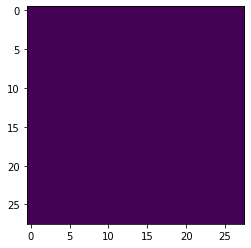

In [22]:
from matplotlib import pyplot as plt
test = blankimg.reshape(28,28)
test = test.astype(np.uint8)
plt.imshow(test)
plt.show()

In [ ]:
cv2.destroyAllWindows()

In [8]:
type(test)

numpy.ndarray

In [34]:
knn.predict('test_cell.png')

AttributeError: 'KNN' object has no attribute 'predict_proba'

In [33]:
len(knn.digits)//7

9013

In [19]:
knn = KNN(3)
report_3 = knn.skl_knn()
print(report_3)

              precision    recall  f1-score   support

           1       0.97      1.00      0.98      1567
           2       0.98      0.98      0.98      1407
           3       0.97      0.97      0.97      1402
           4       0.98      0.97      0.97      1310
           5       0.98      0.97      0.97      1258
           6       0.98      0.99      0.99      1429
           7       0.97      0.98      0.97      1481
           8       0.99      0.94      0.97      1324
           9       0.96      0.97      0.96      1429
         999       1.00      1.00      1.00      1415

    accuracy                           0.98     14022
   macro avg       0.98      0.98      0.98     14022
weighted avg       0.98      0.98      0.98     14022

None


In [10]:
knn = KNN(4)
report_4 = knn.skl_knn()
print(report_4)

              precision    recall  f1-score   support

           1       0.96      0.99      0.97      1575
           2       0.98      0.97      0.97      1444
           3       0.96      0.97      0.97      1439
           4       0.97      0.98      0.98      1379
           5       0.96      0.96      0.96      1304
           6       0.99      0.99      0.99      1331
           7       0.96      0.97      0.96      1453
           8       0.99      0.93      0.96      1331
           9       0.96      0.95      0.96      1364

    accuracy                           0.97     12620
   macro avg       0.97      0.97      0.97     12620
weighted avg       0.97      0.97      0.97     12620

None


In [11]:
knn = KNN(5)
report_5 = knn.skl_knn()
print(report_5)

              precision    recall  f1-score   support

           1       0.96      0.99      0.98      1575
           2       0.98      0.97      0.97      1444
           3       0.97      0.97      0.97      1439
           4       0.98      0.97      0.97      1379
           5       0.96      0.97      0.96      1304
           6       0.98      0.99      0.99      1331
           7       0.96      0.97      0.97      1453
           8       0.99      0.94      0.96      1331
           9       0.95      0.96      0.96      1364

    accuracy                           0.97     12620
   macro avg       0.97      0.97      0.97     12620
weighted avg       0.97      0.97      0.97     12620

None


In [12]:
knn = KNN(6)
report_6 = knn.skl_knn()
print(report_6)

              precision    recall  f1-score   support

           1       0.95      0.99      0.97      1575
           2       0.98      0.96      0.97      1444
           3       0.96      0.97      0.97      1439
           4       0.98      0.97      0.98      1379
           5       0.97      0.96      0.96      1304
           6       0.99      0.99      0.99      1331
           7       0.95      0.97      0.96      1453
           8       0.99      0.93      0.96      1331
           9       0.96      0.96      0.96      1364

    accuracy                           0.97     12620
   macro avg       0.97      0.97      0.97     12620
weighted avg       0.97      0.97      0.97     12620

None


In [100]:
X_Train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
nonzero_indexes = []
for i in range(len(KNN.mnist['target'])):
    if int(KNN.mnist['target'][i]) > 0:
        nonzero_indexes.append(i)
    else:
        pass

In [42]:
nonzero_indexes

63097

In [44]:
KNN.mnist['data'][nonzero_indexes]

63097

ModuleNotFoundError: No module named 'tensorflow'